In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os 
working_directory = os.getcwd()
print(working_directory)
import seaborn as sb
import sklearn
from sklearn.linear_model import LinearRegression
import math

/Users/jerrylouisobobairibhojie


In [2]:
names = ['mpg','cylinders','displacement','horsepower',
        'weight','acceleration','model year','origin','car name']

In [3]:
df = pd.read_csv(working_directory + '/auto/auto-mpg.data',header=None,
                delim_whitespace=True,names=names,na_values='?')

In [4]:
df.head(6)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500


In [5]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

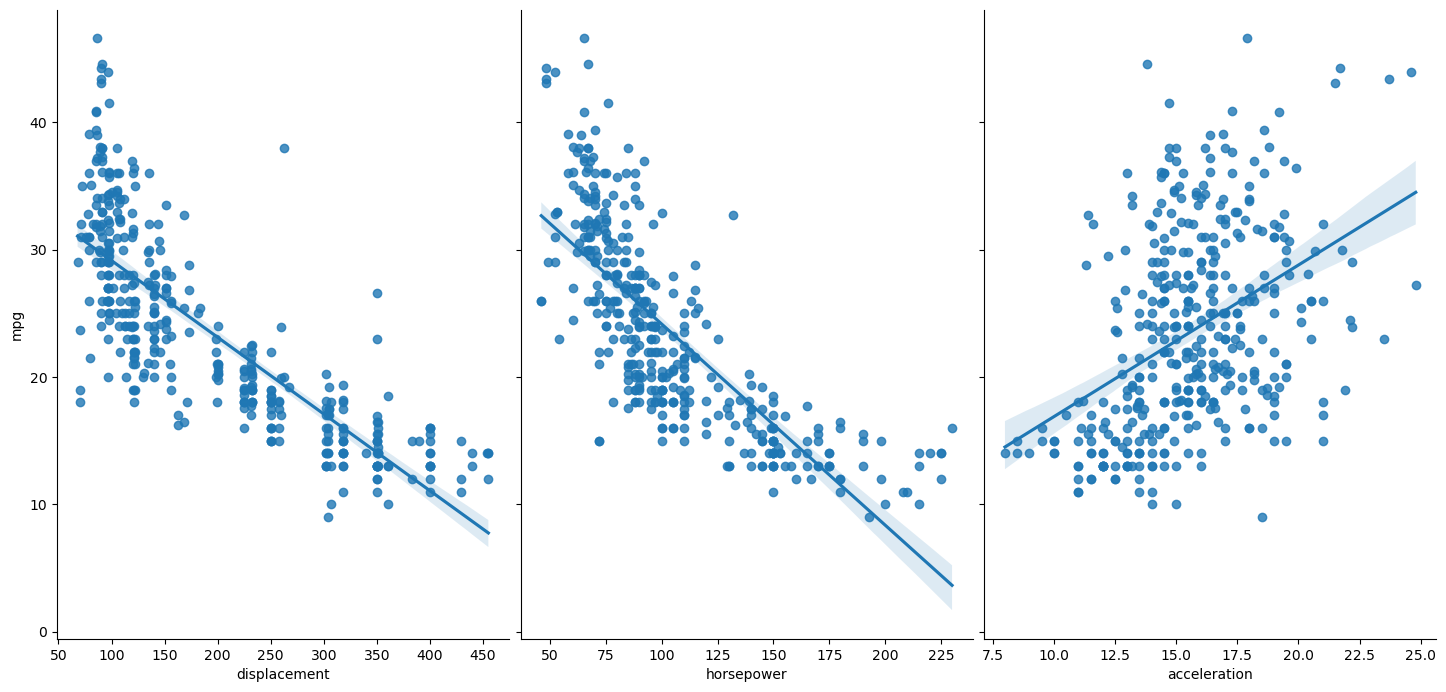

In [69]:
sb.pairplot(df, x_vars=['displacement','horsepower','acceleration'],
             y_vars = 'mpg',height =7,aspect = 0.7,kind='reg',)

In [171]:
feature_cols = ['displacement','horsepower','acceleration']

In [172]:
x = df[feature_cols]

In [173]:
x

,displacement,horsepower,acceleration
0,307.0,130.0,12.0
1,350.0,165.0,11.5
2,318.0,150.0,11.0
3,304.0,150.0,12.0
4,302.0,140.0,10.5
...,...,...,...
393,140.0,86.0,15.6
394,97.0,52.0,24.6
395,135.0,84.0,11.6
396,120.0,79.0,18.6


In [174]:
y = df['mpg']

In [175]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

In [176]:
from sklearn.model_selection import train_test_split

In [177]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1)
print(x_train.shape)
print(y_train.shape)
print(y_test.shape)
print(y_test.shape)

(298, 3)
(298,)
(100,)
(100,)


In [178]:
from sklearn.linear_model import LinearRegression

In [179]:
x_train = x_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
linreg = LinearRegression()
linreg.fit(x_train,y_train)


LinearRegression()

In [184]:
print(linreg.intercept_)
print(linreg.coef_)
    

43.35552581967277
[-0.04531677 -0.06235466 -0.30340653]


In [181]:
xm = np.mean(x_train)
ym = np.mean(y_train)
sxx = np.mean((x_train-xm)**2)
syy = np.mean((y_train-ym)**2)
sxy = np.mean((x_train-xm)*(y_train-ym))
beta1 = (sxy/sxx)
beta0 = ym - beta1*xm
ssyy= np.sqrt(syy)
ssxx= np.sqrt(sxx)
print(sxx,syy,ssyy)


displacement    10362.732366
horsepower       1579.045595
acceleration        7.548445
dtype: float64 62.981020336921745 7.936058236739556
